# California Housing Dataset - Python - EDA Project

## Introduction 

This project is based on the California Housing Dataset which is available on kaggle. This dataset is provides the information about the residential properties in various districts in California. This dataset is based on the 1990 US census. It is mainly used to predict the Median House Value. It can also be used to observe market trends, and how different factors impact the house evaluation.
##### Features
There are 10 features of the dataset: 

##### 1- Longitue & Latitude (Continuous Feature)
These two features provide the coordinates of the location. 


##### 2- Housing Median Age (Continuous Feature)
This provides information about the age of the houses in the district. Lower the number, newer the property.


##### 3- Total Rooms (Discrete Feature)
Total number of rooms in the district. 


##### 4- Total Bedrooms (Discrete Feature)
Total number of bedrooms in the district.


##### 5- Population (Discrete Feature)
Total population of the district.


##### 6- Households (Discrete Feature)
Households or number of people residing in a house in the district.


##### 7- Median Income (Continuous Feature)
Median Income of the households which is in per ten thousands US dollars per annum.


##### 8- Median House Value (Continuous Feature)
Median house value in the district.


##### 9- Ocean proximity (Nominal Feature)
It shows proximity of the district to the ocean.


In [1]:
#importing the required libraries
import pandas as pd    # for data processing 
import seaborn as sns  # for visualiztions
from matplotlib import pyplot as plt    # for visualiztions

In [2]:
# reading the file
df=pd.read_excel(r"C:\\Users\\Admin\\Desktop\\Bindu\\Python\\Projects\\Odin Python advance project 102\\housing+(1) - dataset for PA-102 MP.xlsx")

df.shape   # checking the shape of the data

(20640, 10)

In [3]:
# reviewing the data by checking the top 5 lines
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [4]:
# Using info to check the data types. It also provides the information on null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Observation:
All columns are integers or float type except the 'Ocean proximity'

In [5]:
# Here we are checking if there are any null values in any of the columns in the data
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Observation: 
We can see that 'total_bedrooms' have 207 null values.

____________________________________________________________________________________

Q1:

What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [6]:
# Using mean to derive the average of the median_income
df.median_income.mean()

3.8706710029070246

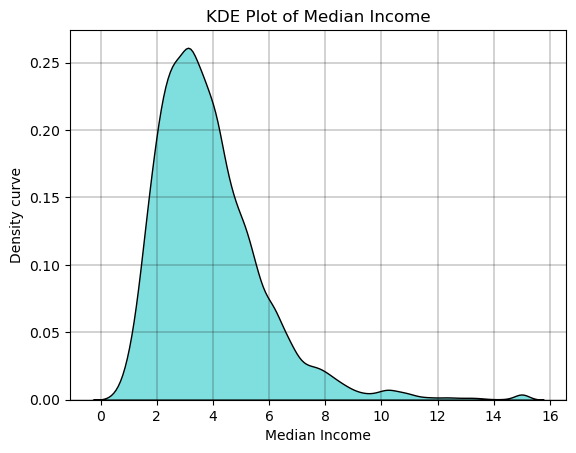

In [7]:
sns.kdeplot(df['median_income'], shade=True, alpha =0.5, color='c', edgecolor='black')
plt.xlabel('Median Income')
plt.ylabel('Density curve')
plt.title('KDE Plot of Median Income')
plt.grid(color='k', lw=0.25)
plt.show()


### Observation:
The average of the median _income is '38,700 dollars per annum'. 
The above density curve shows that approximately 25 percent of the data points lies below the average or mean. It means that roughly 25 percent of data points have median_income below $ 38,700

___________________________________________________________________________________

Q2:

Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

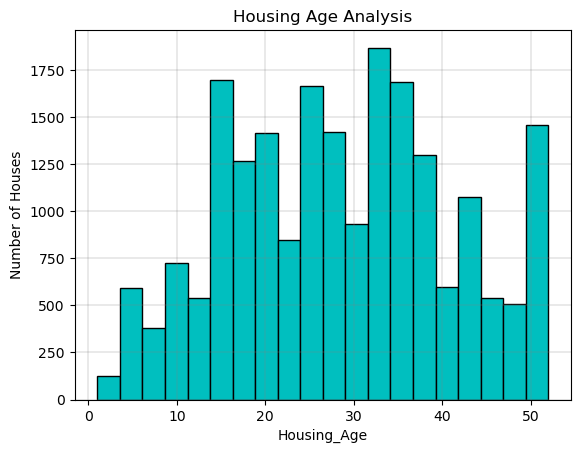

In [8]:
sns.histplot(df['housing_median_age'], bins=20, edgecolor='black', facecolor='c')
plt.title('Housing Age Analysis')
plt.xlabel('Housing_Age')
plt.ylabel('Number of Houses')
plt.grid(color='grey', lw=0.25)


### Observation:
Housing_median_age column shows the age of the house within a block. The lower is the number, newer is the construction. 
The visualization shows that most of the houses are average construction i.e. between 30-40.


________________________________________________________________________________________________

Q3:
    
Show with the help of visualization, how median_income and median_house_values are related?

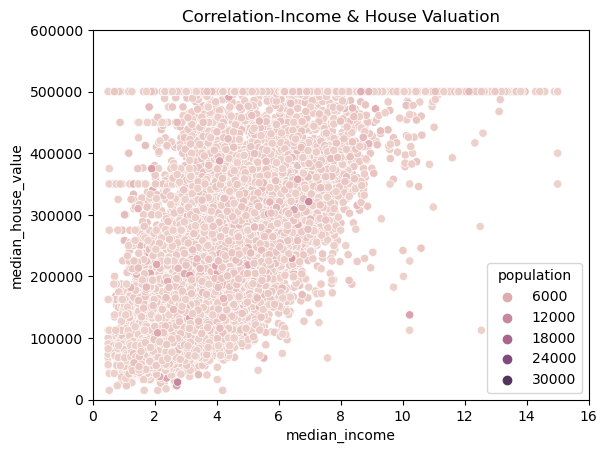

In [9]:
ax= sns.scatterplot(data=df, x='median_income',y='median_house_value',hue='population')
ax.set(title='Correlation-Income & House Valuation')
plt.axis([0,16, 0,600000]);

### Observation:
I have used scatter plot to visualize the relation between house value and income. I have used population as the hue to bring in more differentiation in the representation. The above representation depicts a positive correlation between the two variable, which means that as the income rises, the house value rises too. 
With this we can conclude that the people with higher income buy more expensive houses.


### Finding correlation
- pandas has corr method for calculating correlations
- always b/w -1 and +1

In [10]:
corr_matrix=df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

_____________________________________________________________________________________________

Q4:

Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.


In [11]:
# Dropping the data and corresponding examples where there are no values and assigning to a new variable
new_df=df.dropna()

In [12]:
#checking the shape of the newly created dataset after dropping NA values and their corresponding data
new_df.shape

(20433, 10)

In [13]:
# checking the top 5 rows.
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


_____________________________________________________________________________________________

Q5:

Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [16]:
# Replacing the null values in column 'total_bedrooms' with the mean value of the column. 
#'inplace' will update the original dataset itself.
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

# Below code will show the null values in the updated dataset.
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Observation:
In cell 5 we saw that there are 207 null values in the column 'total_bedrooms' but now we have updated it with its mean value.
Now the cell 16 shows that there are no null values in the dataset anymore.

__________________________________________________________________________________________

Q6:

Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [134]:
# Creating a class/object for the functions.
class Value:
    def median(self, df,column):
        self.median=df[column].median()
        return self.median
    def mean(self, df, column):
        self.mean=df[column].mean()
        return self.mean

In [147]:
# This is for demonstration purpose only
calc=Value()
calc.median(df,'median_income')
calc.median

3.5347999999999997

In [136]:
#Alternate method of defining function.
def Median_calc(df,column):
    return df[column].median()

In [137]:
Median_calc(df,'median_income')

3.5347999999999997

### Observation:
I have choosen to use the OOPS approach here and created a class for values. In which I have defined functions for median and mean.
I have done so, keeping in mind that these need to be used at different stages of the data exploration. Also, question 9 requires the mean and median to be calculated again.
Alternatively I have defined a simpler user defined function.

_______________________________________________________________________________________________

Q7:

Plot latitude versus longitude and explain your observations.

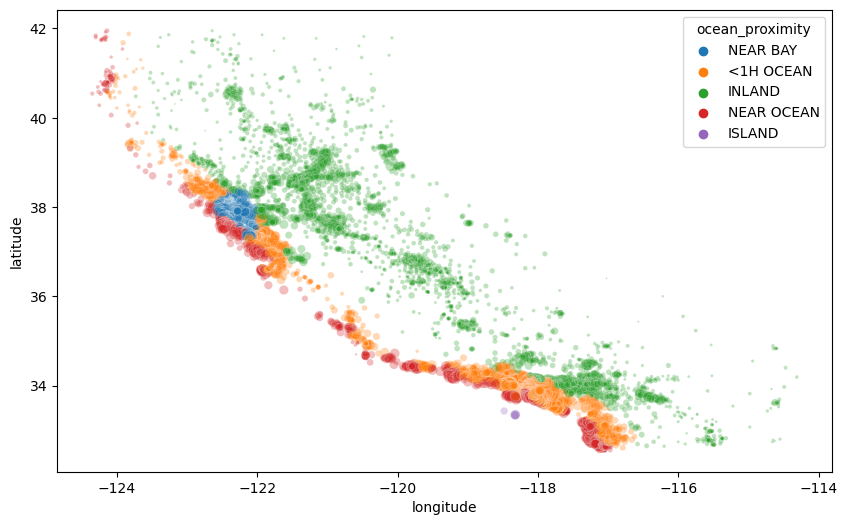

In [77]:
# Creating a scatterplot to show the latitude and logitude.
# Also considered 'Ocean Proximity' and Median house value for futher detailed analysis.
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, y='latitude', x='longitude', hue='ocean_proximity',alpha=0.3, 
               s=df['median_house_value']/10000);


### Observation:
The scatterplot above shows the map of California, considering that it is plotted using latitude and longitude. I have futher extended the analysis by incorporating 'hue' for 'Ocean_proximity' and 'size'
which represents 'median_house_value'.
All the red points on the plot shows that the properties close to Ocean and are expensive. Orange ones are properties which are at one hour distance from the oceans and are comparatively cheaper than the red ones.
The green represents inland properties which are less expensive as these are away from the oceans.

___________________________________________________________________________________________

Q8:

Create a data set for which the ocean_proximity is ‘Near ocean’.

In [95]:
# Checking the number of dataset for 'Near Ocean' so that we can verify it later with new data set
df1=df.groupby('ocean_proximity') #grouping the items in the column.
# checking the size of all categories
df1.size() 

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

In [90]:
# Filtering the data set on the basis of 'Near Ocean' data points and assigning it to a variable.
df_no=df[df['ocean_proximity']=='NEAR OCEAN']

# checking the shape and size of the dataset. 
df_no.shape

(2658, 10)

In [96]:
#Checking the datasets top 10 data points
df_no.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
1855,-124.22,41.73,28,3003,699.0,1530,653,1.7038,78300,NEAR OCEAN
1856,-124.21,41.75,20,3810,787.0,1993,721,2.0074,66900,NEAR OCEAN
1857,-124.17,41.76,20,2673,538.0,1282,514,2.4605,105900,NEAR OCEAN
1858,-124.16,41.74,15,2715,569.0,1532,530,2.1829,69500,NEAR OCEAN
1859,-124.14,41.95,21,2696,578.0,1208,494,2.2750,122400,NEAR OCEAN


### Observation:
The filtered dataset size matches with 'Near Ocean' data points size checked above for the original data. It means we have captured all the details.

_______________________________________________________________________________________________

Q9:

Find the mean and median of the median income for the data set created in question 8.


In [150]:
# Calculating mean
calc=Value()
calc.median(df_no,'median_income')

3.64705

In [151]:
#Calculating median
calc.mean(df_no,'median_income')

4.005784800601957

###  Observation:
I have used the class Object 'Value' to calculate the mean and median created in Q6.

__________________________________________________________________________________________________

Q10:

Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [176]:
# Defining a condition to filter the data and map it.
def condition(total_bedrooms):
    if total_bedrooms<=10:
        return 'small'
    elif total_bedrooms<1000:
        return 'medium'
    else:
        return 'large'
# Applyng the condition to column 'total_bedrooms' and renaming data points accordingly
df['total_bedroom_size']=df['total_bedrooms'].apply(condition)

# Inserting the column at the right index
df.insert(5, 'total_bedroom_size', df.pop('total_bedroom_size'))

# Checking the data for first 10 entries
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,total_bedroom_size,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,medium,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,large,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,medium,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,medium,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,medium,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,medium,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,medium,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,medium,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,medium,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,medium,1551,714,3.6912,261100,NEAR BAY


###  Observation:
To acheive the desired result, I have defined the condition first and then applied it to the data. I have also inserted it at the right index for better visibility and analysis.

_______________________________________________________________________________________________